In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data Source : https://www.kaggle.com/mlg-ulb/creditcardfraud
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

###### DATA ANALYSIS

In [5]:
total_trans=df['Class'].value_counts().sum()
fraud_df=df[df['Class']==1]
print(f'Total Transactions : {total_trans}\nTotal Fraud Transaction : {len(fraud_df)}')

Total Transactions : 284807
Total Fraud Transaction : 492


In [6]:
total_amount=df['Amount'].sum()
fraud_amount=fraud_df['Amount'].sum()
print(f'Total amount : {np.round(total_amount,2)}\nTotal amount of fraud : {fraud_amount}')

Total amount : 25162590.01
Total amount of fraud : 60127.97


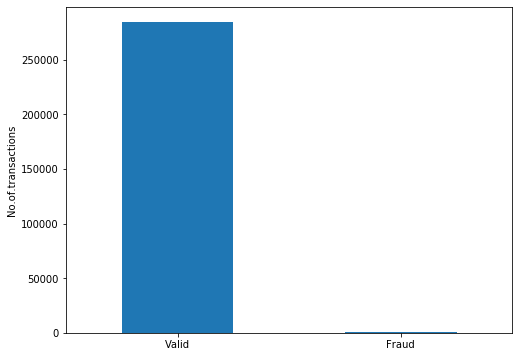

In [7]:
plt.figure(figsize=(8,6))
count= pd.value_counts(df['Class'], sort = True)
count.plot(kind = 'bar', rot=0)
plt.xticks(range(2),['Valid','Fraud'])
plt.ylabel('No.of.transactions')
plt.show()

######  SAMPLE DATA 

In [8]:
data= df.sample(frac = 0.1,random_state=1)
data.shape

(28481, 31)

In [9]:
valid=data[data['Class']==0]
fraud=data[data['Class']==1]
perofvalid=len(valid)/len(data)
peroffraud=len(fraud)/len(data)
outlier_fraction = len(fraud)/float(len(valid))
print(f'Valid cases : {len(valid)} ({np.round(perofvalid,4)} %)\nFraud cases : {len(fraud)} ({np.round(peroffraud,4)} %)\nOutlier Fraction : {outlier_fraction}')

Valid cases : 28432 (0.9983 %)
Fraud cases : 49 (0.0017 %)
Outlier Fraction : 0.0017234102419808666


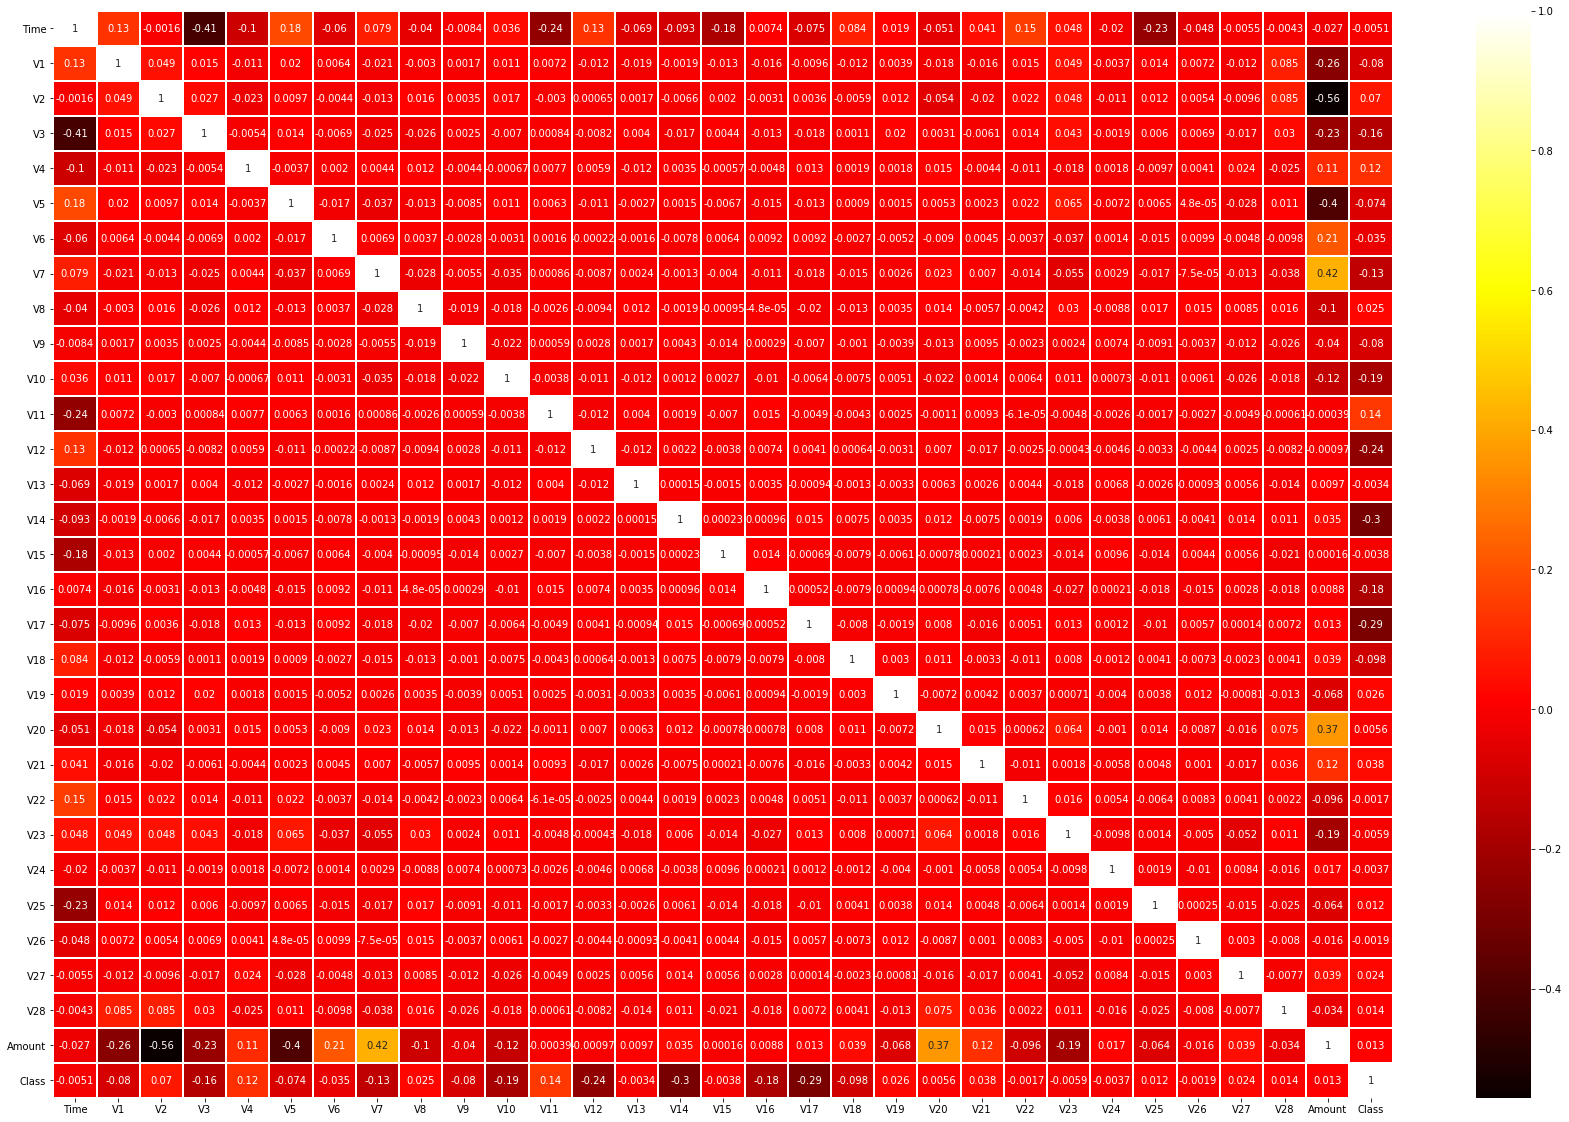

In [10]:
# correlation matrix
cormat=data.corr()
plt.figure(figsize=(30,20))
sns.heatmap(cormat,cmap='hot',linewidths=1,annot=True)

In [11]:
columns=data.columns.tolist()
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [12]:
X=data.drop('Class',axis=1)
y=data['Class'].values

###### MODEL PREDICTION

In [13]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [14]:
# creating a dictionary
classifiers =   {
    'Isolation Forest':IsolationForest(max_samples=len(X),contamination=outlier_fraction,random_state=1,verbose=0),
    'Local Outlier Factor':LocalOutlierFactor(contamination=outlier_fraction)
                }

In [15]:
n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
    else:    
        clf.fit(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    # check the accuracy_score
    print('{} : {}'.format(clf_name,n_errors))
    print(f'Accuracy Score : {accuracy_score(y,y_pred)}')

Isolation Forest : 71
Accuracy Score : 0.99750711000316
Local Outlier Factor : 97
Accuracy Score : 0.9965942207085425
